# FASHION

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


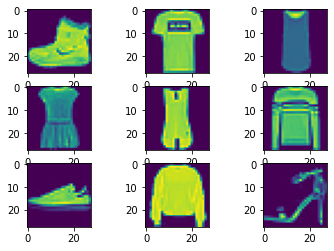

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 128)               100480    
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               16512     
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 128)               16512     
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 dense_8 (Dense)             (None, 128)              

In [ ]:
from keras.datasets import fashion_mnist
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.optimizers import RMSprop
import numpy as np
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img
from tensorflow.keras.utils import load_img,img_to_array,array_to_img
from matplotlib.pyplot import imshow

(x_train, y_train),(x_test,y_test) = fashion_mnist.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
for i in range(9):
  plt.subplot(330 + 1 + i)
  plt.imshow(x_train[i])
plt.show()
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train/=255
x_test/=255
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
model = Sequential()
model.add(Dense(128,activation='relu', input_shape = (784,)))
model.add(Dropout(0.2))
model.add(Dense(128,activation='relu')) 
model.add(Dropout(0.2))
model.add(Dense(128,activation='relu')) 
model.add(Dropout(0.2))
model.add(Dense(128,activation='relu')) 
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))
model.summary()

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer = RMSprop(), metrics = ['accuracy'])
history = model.fit(x_train, y_train, batch_size=128, epochs = 500, verbose = 1, validation_data=[x_test,y_test])

Epoch 1/500
469/469 [==============================] - 5s 9ms/step - loss: 0.6824 - accuracy: 0.7494 - val_loss: 0.4609 - val_accuracy: 0.8305
Epoch 2/500
469/469 [==============================] - 4s 8ms/step - loss: 0.4639 - accuracy: 0.8352 - val_loss: 0.4306 - val_accuracy: 0.8484
Epoch 3/500
469/469 [==============================] - 4s 9ms/step - loss: 0.4229 - accuracy: 0.8486 - val_loss: 0.4038 - val_accuracy: 0.8539
Epoch 4/500
469/469 [==============================] - 4s 8ms/step - loss: 0.3942 - accuracy: 0.8601 - val_loss: 0.3856 - val_accuracy: 0.8615
Epoch 5/500
469/469 [==============================] - 4s 9ms/step - loss: 0.3762 - accuracy: 0.8650 - val_loss: 0.3795 - val_accuracy: 0.8666
Epoch 6/500
469/469 [==============================] - 4s 9ms/step - loss: 0.3634 - accuracy: 0.8706 - val_loss: 0.3760 - val_accuracy: 0.8645
Epoch 7/500
469/469 [==============================] - 4s 9ms/step - loss: 0.3530 - accuracy: 0.8742 - val_loss: 0.4024 - val_accuracy: 0.8609

In [ ]:
score = model.evaluate(x_test,y_test,verbose=0)
print('Sai số: ',score[0])
print('Độ chính xác: ',score[1])

Sai số:  0.9592462182044983
Độ chính xác:  0.8747000098228455


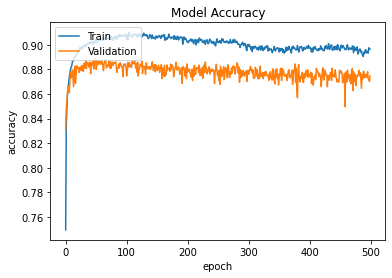

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc = 'upper left')
plt.show()

In [ ]:
model.save('./content/drive/MyDrive/AI_EXAM/Fashion.h5')

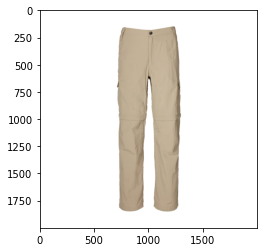

In [ ]:
plt.imshow(load_img('/content/drive/MyDrive/AI_TEST/quan1.png'))

array([8])

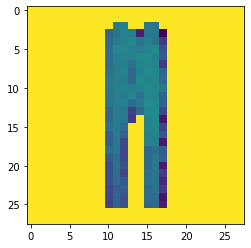

In [ ]:
from tensorflow.keras.models import load_model

filename = '/content/drive/MyDrive/AI_TEST/quan1.png'
img = load_img(filename, target_size=(28,28), color_mode = 'grayscale')
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1, 784)
img = img.astype('float32')
img = img/255
np.argmax(model.predict(img),axis=-1)